In [5]:
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
import os
from PIL import Image

In [19]:
dataset_path = r'C:\Users\Siddhartha Devan V\Downloads\datasets\mnist_images'
os.listdir(dataset_path)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(28, 28, 3)


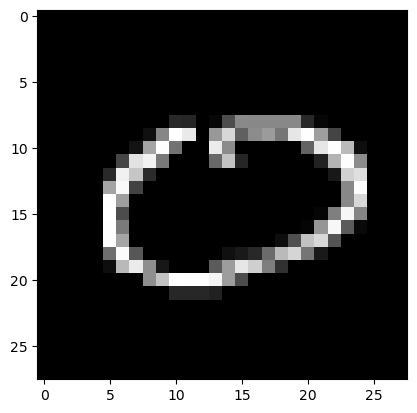

In [22]:
img = cv2.imread(r"C:\Users\Siddhartha Devan V\Downloads\datasets\mnist_images\0\0_260.png")
plt.imshow(img)
print(img.shape)

In [50]:

img_gr = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [53]:
img_gr.shape

(28, 28)

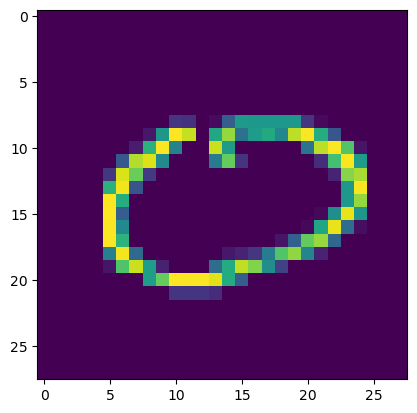

In [52]:
plt.imshow(img_gr)

In [55]:
struct = np.zeros((80,80))

In [67]:
for i in range(28):
    for j in range(28):
        struct[i][j] += img_gr[i][j]

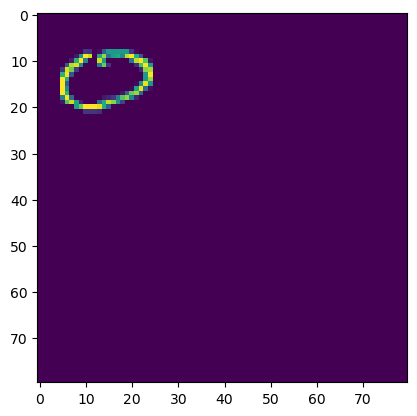

In [68]:
plt.imshow(struct)
